## 작성법

1. 전처리는 각자의 아이디어로 진행
2. **(중요)** 1번, 2번 Modeling 섹션에 코드는 제출시엔 핵심 코드만 남기고 제출 (불필요한 코드가 많을시 감점)
3. **(중요)** Tree 기반의 모델 생성 시 시드설정 필수 (안할 시 감점 -5점)
4. 과도한 주석 사용 금지
   - 최대한 변수명, 함수명을 명확하게 정의하여 최소한의 주석만으로 다른 사람이 나의 코드를 이해할 수 있게 짜야함
   - 기능별로 주석을 적고자 할 땐 셀을 나눠 기능별로 구분하면 가독성을 높일 수 있음
   - 참고: https://www.youtube.com/watch?v=IgvNCnb2MzM

---

In [47]:
# 수정금지
def seed_everything(seed: int=42):
    import random
    import numpy as np
    import os

    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

RANDOM_SEED = 486
seed_everything(seed=RANDOM_SEED)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [49]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

## • Dataset

In [50]:
train_set = pd.read_csv('C:/Users/symply_jina/Desktop/seohyun/IIE3104/hw2/train_set.csv')
test_X = pd.read_csv('C:/Users/symply_jina/Desktop/seohyun/IIE3104/hw2/test_X.csv')

In [51]:
train_set.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.091363,0.465497,0.206236,0.097497,0.171184,0.415997,0.775862,0.455559,0.412855,0.394780,...,0.099249,0.736111,0.011305,0.015625,0.010980,0.512945,0.136187,0.156716,0.083217,1
1,0.275930,0.364365,0.302236,0.376615,0.485135,0.627270,0.594828,0.435673,0.420272,0.367047,...,0.246376,0.586806,0.008532,0.015625,0.008613,0.343042,0.151751,0.164179,0.143012,1
2,0.036582,0.334300,0.361890,0.089591,0.091509,0.530866,0.560345,0.543236,0.358467,0.541599,...,0.084155,0.590278,0.003200,0.006836,0.003447,0.610032,0.142023,0.119403,0.070561,-1
3,0.502853,0.437227,0.586015,0.551821,0.210496,0.396424,0.474138,0.724616,0.457355,0.380098,...,0.246376,0.857639,0.017918,0.019531,0.017077,0.144013,0.342412,0.358209,0.838465,-1
4,0.449084,0.168458,0.473071,0.540531,0.235641,0.387071,0.758621,0.295872,0.402967,0.489396,...,0.283929,0.625000,0.005546,0.007812,0.005731,0.273463,0.215953,0.276119,0.238064,-1


In [52]:
test_X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474
0,0.373044,0.500048,0.318866,0.113673,0.181737,0.500728,0.543103,0.595661,0.218789,0.451876,...,0.410448,0.145439,0.434028,0.017065,0.019531,0.017146,0.629450,0.317121,0.410448,0.121946
1,0.659672,0.367706,0.179527,0.029298,0.215474,0.537828,0.568966,0.366978,0.417800,0.592170,...,0.283280,0.246376,0.673611,0.017491,0.025391,0.016973,0.176375,0.136187,0.186567,0.317129
2,0.352476,0.401779,0.463937,0.126285,0.083402,0.491896,0.284483,0.473938,0.483313,0.543230,...,0.283280,0.246376,0.697917,0.024104,0.033203,0.023404,0.428803,0.116732,0.126866,0.093068
3,0.249908,0.331418,0.361890,0.089591,0.091509,0.530866,0.560345,0.818620,0.320148,0.699837,...,0.283280,0.246376,0.704861,0.033276,0.031250,0.032133,0.504854,0.000000,0.000000,0.032254
4,0.197750,0.390574,0.222614,0.132807,0.154885,0.430756,0.500000,0.463091,0.483313,0.632953,...,0.283280,0.246376,0.902778,0.039676,0.034180,0.037589,0.148867,0.247082,0.328358,0.611548


In [53]:
train_X = train_set.drop('Y', axis = 1)
train_Y = train_set['Y']

train_X.isna().sum() # 행별 결측치 개수 관측

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X470    0
X471    0
X472    0
X473    0
X474    0
Length: 474, dtype: int64

## • Preprocessing

- 전처리는 각자의 아이디어를 반영하여 진행

**⚠️ 주의사항**:
> 이상치 제거는 학습할 때만 사용
>
> - Test Set의 이상치를 제거하는것은 관찰자를 예측에서 제외 시켜버리는 것과 같음
> - 따라서 Real-World의 관점에서 적합하지 않음

In [54]:
pd.DataFrame({
    'Min': train_X.min(axis=0),
    'Max': train_X.max(axis=0),
    'Mean': train_X.mean(axis=0),
    'Std': train_X.std(axis=0)
})

,Min,Max,Mean,Std
X1,0.036582,1.000000,0.395527,0.166594
X2,0.056331,1.000000,0.419683,0.151138
X3,0.094992,1.000000,0.372956,0.166990
X4,0.000000,1.000000,0.305515,0.226031
X5,0.000000,1.000000,0.176096,0.092270
...,...,...,...,...
X470,0.000000,1.000000,0.019682,0.070269
X471,0.000000,0.936893,0.391774,0.163002
X472,0.000000,1.000000,0.272208,0.166417
X473,0.000000,1.000000,0.311662,0.193166


In [55]:
pd.DataFrame({
    'Min': test_X.min(axis=0),
    'Max': test_X.max(axis=0),
    'Mean': test_X.mean(axis=0),
    'Std': test_X.std(axis=0)
})

,Min,Max,Mean,Std
X1,0.000000,0.848587,0.388594,0.160610
X2,0.000000,0.999370,0.394480,0.169796
X3,0.000000,0.716094,0.369924,0.158950
X4,0.019864,0.897684,0.292373,0.226018
X5,0.011435,0.434019,0.169339,0.083319
...,...,...,...,...
X470,0.000908,0.078067,0.015862,0.011544
X471,0.035599,1.000000,0.375024,0.187543
X472,0.000000,0.859922,0.214199,0.160920
X473,0.000000,0.985075,0.247732,0.187336


In [56]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Columns: 474 entries, X1 to X474
dtypes: float64(468), int64(6)
memory usage: 751.9 KB


In [57]:
# int64 타입의 컬럼 출력
int_columns = train_X.select_dtypes(include=['int64']).columns
print("int64 타입 컬럼:")
print(int_columns)

# int64 타입 컬럼들의 값이 모두 0인지 확인
print("\ntrain 데이터의 int64 컬럼 값 확인:")
for col in int_columns:
    print(f"{col}의 unique 값:", train_X[col].unique())

# int64 타입의 컬럼 제거
train_X = train_X.select_dtypes(exclude=['int64'])
test_X = test_X.select_dtypes(exclude=['int64'])

print("\nint64 타입 컬럼 제거 후 데이터 형태:")
print("train_X 형태:", train_X.shape)
print("test_X 형태:", test_X.shape)


int64 타입 컬럼:
Index(['X69', 'X189', 'X192', 'X288', 'X293', 'X389'], dtype='object')

train 데이터의 int64 컬럼 값 확인:
X69의 unique 값: [0]
X189의 unique 값: [0]
X192의 unique 값: [0]
X288의 unique 값: [0]
X293의 unique 값: [0]
X389의 unique 값: [0]

int64 타입 컬럼 제거 후 데이터 형태:
train_X 형태: (203, 468)
test_X 형태: (51, 468)


In [58]:
# Min-Max scaler version
X_train, X_valid, Y_train, Y_valid = train_test_split(train_X, train_Y, test_size = 0.2, shuffle = True, stratify = train_Y, random_state = RANDOM_SEED)
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = train_X.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns = train_X.columns)

## • Feature Selection by Dimensionality Reduction

- mRMR, SVM-RFE 등 차원축소 기법을 사용하여 변수 선택 진행
- **(중요)** 분석의 재현이 가능하도록 차원축소 기법으로 최종 선택한 변수명을 셀에 출력 (미출력시 감점 -5점)

In [59]:
# Lasso 변수 선택
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# Lasso 모델 생성
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=RANDOM_SEED)

# Grid Search를 위한 파라미터 설정
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # C는 규제 강도의 역수
}

# Grid Search 수행
grid_search = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, Y_train)

# 최적의 파라미터로 모델 생성
best_lasso = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=grid_search.best_params_['C'],
    random_state=RANDOM_SEED
)
best_lasso.fit(X_train, Y_train)

print("최적의 C값:", grid_search.best_params_['C'])

# 변수 중요도 기반 특성 선택
selector = SelectFromModel(best_lasso, prefit=True)

# 선택된 특성의 인덱스 추출
selected_features_lasso = X_train.columns[selector.get_support()]

print("\nLasso로 선택된 변수 개수:", len(selected_features_lasso))
print("\nLasso로 선택된 변수:")
print(selected_features_lasso)

# 선택된 변수만 사용하여 데이터셋 변환
X_train_lasso = X_train[selected_features_lasso]
X_valid_lasso = X_valid[selected_features_lasso]
test_X_lasso = test_X[selected_features_lasso]


최적의 C값: 1
최고 정확도: 0.8460227272727273

Lasso로 선택된 변수 개수: 35

Lasso로 선택된 변수:
Index(['X8', 'X16', 'X22', 'X27', 'X36', 'X41', 'X48', 'X70', 'X86', 'X97',
       'X136', 'X169', 'X183', 'X212', 'X229', 'X241', 'X261', 'X272', 'X287',
       'X290', 'X303', 'X326', 'X341', 'X369', 'X377', 'X379', 'X391', 'X394',
       'X396', 'X398', 'X408', 'X411', 'X412', 'X426', 'X431'],
      dtype='object')


In [60]:
# mRMR

import numpy as np
k = 65
S = []

corr_matrix = (pd.concat([X_train, Y_train], axis = 1).corr().drop('Y'))
S.append(corr_matrix.index[np.argmax(corr_matrix['Y'])])

for i in range(1, k):
   relevance = np.abs(corr_matrix['Y'])
   redundancy = np.mean(np.abs(corr_matrix.loc[:, S]), axis = 1)
   candidate = (relevance - redundancy)
   candidate = candidate.drop(S)
   S.append(candidate.index[np.argmax(candidate)])

In [61]:
S

['X274',
 'X90',
 'X253',
 'X392',
 'X448',
 'X465',
 'X332',
 'X97',
 'X135',
 'X474',
 'X175',
 'X107',
 'X324',
 'X39',
 'X190',
 'X302',
 'X360',
 'X375',
 'X408',
 'X464',
 'X229',
 'X318',
 'X330',
 'X415',
 'X95',
 'X337',
 'X11',
 'X108',
 'X289',
 'X130',
 'X410',
 'X105',
 'X75',
 'X29',
 'X221',
 'X276',
 'X354',
 'X466',
 'X35',
 'X247',
 'X390',
 'X103',
 'X160',
 'X201',
 'X74',
 'X321',
 'X154',
 'X216',
 'X473',
 'X420',
 'X119',
 'X359',
 'X50',
 'X194',
 'X317',
 'X33',
 'X450',
 'X403',
 'X296',
 'X400',
 'X186',
 'X218',
 'X234',
 'X159',
 'X250']

In [62]:
mRMR = S.copy()
X_train_mRMR = X_train[mRMR]
X_valid_mRMR = X_valid[mRMR]
rf = RandomForestClassifier(random_state = RANDOM_SEED)
rf.fit(X_train_mRMR, Y_train)

pred_mRMR = rf.predict(X_valid_mRMR)
print(classification_report(Y_valid, pred_mRMR, digits=4))

              precision    recall  f1-score   support

          -1     0.8571    1.0000    0.9231        24
           1     1.0000    0.7647    0.8667        17

    accuracy                         0.9024        41
   macro avg     0.9286    0.8824    0.8949        41
weighted avg     0.9164    0.9024    0.8997        41



In [63]:
#SVM-RFE
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

estimator = SVC(kernel = 'linear', random_state = RANDOM_SEED)
selector = RFE(estimator)
selector = selector.fit(X_train, Y_train)

X_train.columns[selector.support_]

Index(['X1', 'X2', 'X3', 'X4', 'X7', 'X8', 'X9', 'X11', 'X13', 'X14',
       ...
       'X452', 'X458', 'X460', 'X462', 'X464', 'X468', 'X469', 'X470', 'X471',
       'X472'],
      dtype='object', length=234)

In [64]:
X_train_svm_rfe = selector.transform(X_train)
X_valid_svm_rfe = selector.transform(X_valid)
rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train_svm_rfe, Y_train)

pred_svm_rfe = rf.predict(X_valid_svm_rfe)
print(classification_report(Y_valid, pred_svm_rfe, digits=4))

              precision    recall  f1-score   support

          -1     0.9231    1.0000    0.9600        24
           1     1.0000    0.8824    0.9375        17

    accuracy                         0.9512        41
   macro avg     0.9615    0.9412    0.9487        41
weighted avg     0.9550    0.9512    0.9507        41



In [65]:
# PCA - standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_valid_standard = scaler.transform(X_valid)

n_features = X_train.shape[1]  # 변수 개수
n_samples = X_train.shape[0]   # 샘플 개수
n_components = min(n_features, n_samples)  # 최대 가능한 주성분 수

for i in range(n_components):
    pca = PCA(n_components = i + 1)
    pca.fit(X_train_standard)
    total_expl_var = sum(pca.explained_variance_ratio_) * 100
    print(i + 1, "개의 잠재변수가 설명하는 분산: %.2f%%" %total_expl_var)

1 개의 잠재변수가 설명하는 분산: 5.67%
2 개의 잠재변수가 설명하는 분산: 10.20%
3 개의 잠재변수가 설명하는 분산: 13.86%
4 개의 잠재변수가 설명하는 분산: 17.02%
5 개의 잠재변수가 설명하는 분산: 19.79%
6 개의 잠재변수가 설명하는 분산: 22.40%
7 개의 잠재변수가 설명하는 분산: 24.70%
8 개의 잠재변수가 설명하는 분산: 26.98%
9 개의 잠재변수가 설명하는 분산: 29.17%
10 개의 잠재변수가 설명하는 분산: 31.25%
11 개의 잠재변수가 설명하는 분산: 33.29%
12 개의 잠재변수가 설명하는 분산: 35.33%
13 개의 잠재변수가 설명하는 분산: 37.23%
14 개의 잠재변수가 설명하는 분산: 39.12%
15 개의 잠재변수가 설명하는 분산: 40.90%
16 개의 잠재변수가 설명하는 분산: 42.62%
17 개의 잠재변수가 설명하는 분산: 44.26%
18 개의 잠재변수가 설명하는 분산: 45.83%
19 개의 잠재변수가 설명하는 분산: 47.36%
20 개의 잠재변수가 설명하는 분산: 48.81%
21 개의 잠재변수가 설명하는 분산: 50.25%
22 개의 잠재변수가 설명하는 분산: 51.62%
23 개의 잠재변수가 설명하는 분산: 52.96%
24 개의 잠재변수가 설명하는 분산: 54.22%
25 개의 잠재변수가 설명하는 분산: 55.47%
26 개의 잠재변수가 설명하는 분산: 56.68%
27 개의 잠재변수가 설명하는 분산: 57.87%
28 개의 잠재변수가 설명하는 분산: 58.99%
29 개의 잠재변수가 설명하는 분산: 60.10%
30 개의 잠재변수가 설명하는 분산: 61.18%
31 개의 잠재변수가 설명하는 분산: 62.23%
32 개의 잠재변수가 설명하는 분산: 63.26%
33 개의 잠재변수가 설명하는 분산: 64.28%
34 개의 잠재변수가 설명하는 분산: 65.24%
35 개의 잠재변수가 설명하는 분산: 66.19%
36 개의 잠재변수가 설명하는 분산: 67.12%
37

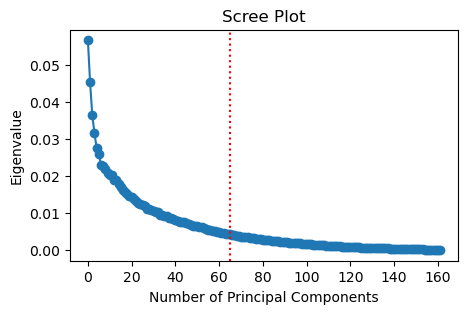

In [66]:
pca = PCA(n_components)
pca.fit(X_train_standard)
plt.figure(figsize=(5, 3))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.axvline(65, color='red', linestyle=':')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue');

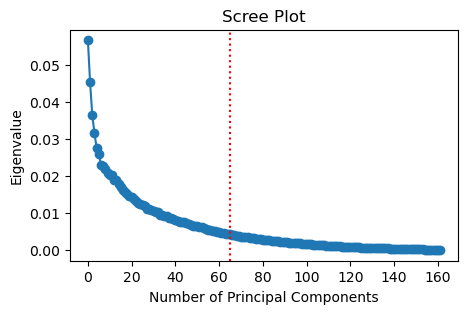

In [67]:
pca = PCA(n_components)
pca.fit(X_train_standard)
plt.figure(figsize=(5, 3))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.axvline(65, color='red', linestyle=':')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue');

In [68]:
pca = PCA(n_components = 65)
X_train_pca = pca.fit_transform(X_train_standard)
X_valid_pca = pca.transform(X_valid_standard)
rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train_pca, Y_train)

pred_pca = rf.predict(X_valid_pca)
print(classification_report(Y_valid, pred_pca, digits=4))

              precision    recall  f1-score   support

          -1     0.7000    0.8750    0.7778        24
           1     0.7273    0.4706    0.5714        17

    accuracy                         0.7073        41
   macro avg     0.7136    0.6728    0.6746        41
weighted avg     0.7113    0.7073    0.6922        41



In [69]:
print("최종적으로 선택된 변수들:")
print(list(X_train_lasso.columns))
print(f"선택된 변수의 개수: {len(list(X_train_lasso.columns))}")  

최종적으로 선택된 변수들:
['X8', 'X16', 'X22', 'X27', 'X36', 'X41', 'X48', 'X70', 'X86', 'X97', 'X136', 'X169', 'X183', 'X212', 'X229', 'X241', 'X261', 'X272', 'X287', 'X290', 'X303', 'X326', 'X341', 'X369', 'X377', 'X379', 'X391', 'X394', 'X396', 'X398', 'X408', 'X411', 'X412', 'X426', 'X431']
선택된 변수의 개수: 35


## • Cross Validation / Hyper-parameter Tuning

- 각자의 아이디어로 교차검증 및 하이퍼파라미터 최적화를 진행

In [70]:
columns = ['X8', 'X16', 'X22', 'X27', 'X36', 'X41', 'X48', 'X70', 'X86', 'X97', 'X136', 'X169', 'X183', 'X212', 'X229', 'X241', 'X261', 'X272', 'X287', 'X290', 'X303', 'X326', 'X341', 'X369', 'X377', 'X379', 'X391', 'X394', 'X396', 'X398', 'X408', 'X411', 'X412', 'X426', 'X431']

train_X_new = train_X[columns]
test_X_new = test_X[columns]

X_train, X_valid, Y_train, Y_valid = train_test_split(train_X_new, train_Y, test_size = 0.2, shuffle = True, stratify = train_Y, random_state = RANDOM_SEED)
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = train_X_new.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns = train_X_new.columns)
test_X_new = pd.DataFrame(scaler.transform(test_X_new), columns = train_X_new.columns)

In [71]:
rf_params = {
    'n_estimators': [100, 300, 500, 700, 900],
    'max_depth': [5, 10, 20, 30, 50],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [0.3, 0.5, 1, 2, 4],
}

rf = RandomForestClassifier()
rnd_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = rf_params,
    scoring = 'f1_weighted',
    n_iter = 10,
    cv = StratifiedKFold(n_splits = 5),
    random_state = RANDOM_SEED,
)

cv_res = rnd_search.fit(X_train, Y_train)
print("Hyperparameter:", cv_res.best_params_)
print("F1-Weighted:", cv_res.best_score_)

Hyperparameter: {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 20}
F1-Weighted: 0.8597375573428788


## • Modeling

- 평가지표는 $F1 \ Score$로 함

**⚠️ 주의사항**:
> 모든 tree 기반의 모델 생성시 시드 설정 (regression, classification 모델 모두 동일)
> 
> ```python
> # 예시
> # default RANDOM_SEED is 486
> rf = RandomForestClassifier(..., random_state=RANDOM_SEED)
> catboost = CatBoostClassifier(..., random_seed=RANDOM_SEED)
> ```

### 1. Random Forest

              precision    recall  f1-score   support

          -1     0.8846    0.9583    0.9200        24
           1     0.9333    0.8235    0.8750        17

    accuracy                         0.9024        41
   macro avg     0.9090    0.8909    0.8975        41
weighted avg     0.9048    0.9024    0.9013        41



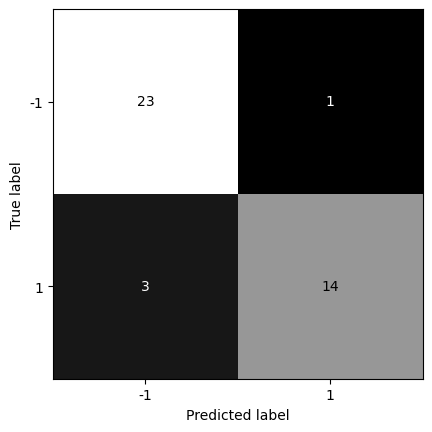

In [72]:
params = {'n_estimators': 700, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 20}
rf = RandomForestClassifier(**params)
rf_model = rf.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_valid)
rf_test = rf_model.predict(test_X_new)

print(classification_report(Y_valid, rf_pred, digits=4))
cm_labels = list(Y_valid.value_counts().sort_index().index)
cm = confusion_matrix(Y_valid, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot(cmap='gray', colorbar=False)

### 2. Gradient Boosting

In [73]:
import numpy as np
gbm_params = {
    'learning_rate': np.arange(0.01, 0.5, 0.01),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [1, 3, 7, 10],
    'min_samples_split': np.arange(0.2, 1.2, 0.2),
    'min_samples_leaf': np.arange(0.1, 1.0, 0.2),
    'subsample': np.arange(0.2, 1.2, 0.2),
}

gbm = GradientBoostingClassifier()
rnd_search = RandomizedSearchCV(
    estimator=gbm, 
    param_distributions=gbm_params,
    scoring='f1_weighted',
    n_iter=10,
    cv=StratifiedKFold(n_splits=5),
    random_state=RANDOM_SEED,
)
cv_res = rnd_search.fit(X_train, Y_train)
print("Hyperparameter:", cv_res.best_params_)
print("F1-Weighted:", cv_res.best_score_)

Hyperparameter: {'subsample': 0.6000000000000001, 'n_estimators': 800, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1, 'max_depth': 3, 'learning_rate': 0.37}
F1-Weighted: 0.8508012256420218


              precision    recall  f1-score   support

          -1     0.8333    0.8333    0.8333        24
           1     0.7647    0.7647    0.7647        17

    accuracy                         0.8049        41
   macro avg     0.7990    0.7990    0.7990        41
weighted avg     0.8049    0.8049    0.8049        41



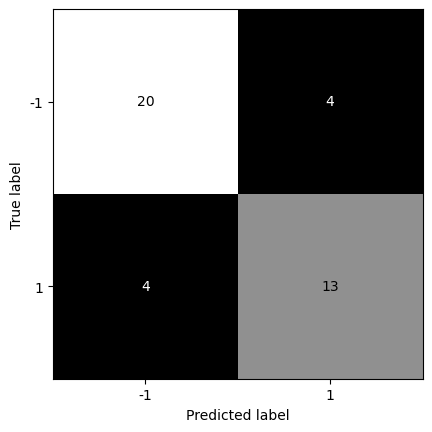

In [74]:
params = {'subsample': 0.6000000000000001, 
          'n_estimators': 800, 
          'min_samples_split': 0.4, 
          'min_samples_leaf': 0.1, 
          'max_depth': 3, 
          'learning_rate': 0.37}

gb = GradientBoostingClassifier(**params)
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_valid)
gb_test = gb.predict(test_X_new)
    
print(classification_report(Y_valid, gb_pred, digits=4))
cm = confusion_matrix(Y_valid, gb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot(cmap='gray', colorbar=False)

### 3. LightGBM

In [75]:
lgb_params ={
    'learning_rate': [0.015, 0.025, 0.05, 0.1, 0.2],
    'num_iterations': [100, 300, 500, 700 ,900],
    'num_leaves': [2, 5, 10, 20, 50],
    'min_child_samples': [20, 50, 100, 500, 1000],
    'max_depth': [1, 3, 5, 7, 9],
}

lgbm = lgb.LGBMClassifier(verbose = 0)
rnd_search = RandomizedSearchCV(
    estimator = lgbm,
    param_distributions = lgb_params,
    scoring = 'f1_weighted',
    n_iter = 10,
    cv=StratifiedKFold(n_splits = 5),
    random_state = RANDOM_SEED,
)

cv_res = rnd_search.fit(X_train, Y_train)
print("Hyperparameter:", cv_res.best_params_)
print("F1-Weighted:", cv_res.best_score_)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

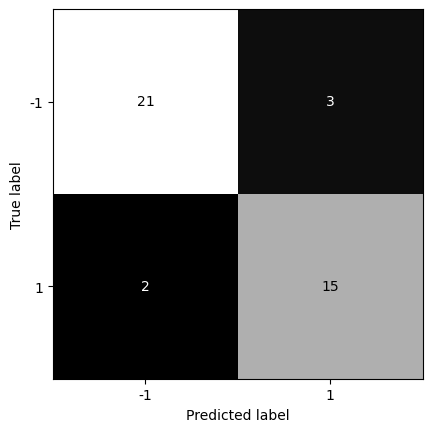

In [76]:
params = {'num_leaves': 20, 'num_iterations': 300, 'min_child_samples': 20, 'max_depth': 3, 'learning_rate': 0.1}

lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train, Y_train)
lgb_pred = lgbm.predict(X_valid)
lgb_test = lgbm.predict(test_X_new)

print(classification_report(Y_valid, lgb_pred, digits=4))
cm = confusion_matrix(Y_valid, lgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot(cmap='gray', colorbar=False)

### 4. XGBoost

In [77]:
xgb_params = {
    'learning_rate': [0.015, 0.025, 0.05, 0.1, 0.2],
    'gamma': [0.05, 0.1, 0.2, 0.5, 1.0],
    'max_depth': [2, 5, 10, 15, 20],
    'lambda': [0.05, 0.1, 0.2, 0.5, 1.0],
    'alpha': [0.05, 0.1, 0.2, 0.5, 1.0],
}

#[-1,1] to [0,1]
Y_train_xgb = (Y_train + 1) // 2

xgbm = xgb.XGBClassifier(verbose = 0)
rnd_search = RandomizedSearchCV(
    estimator = xgbm,
    param_distributions = xgb_params,
    scoring = 'f1_weighted', 
    n_iter = 10,
    cv=StratifiedKFold(n_splits = 5),
    random_state = RANDOM_SEED,
)

cv_res = rnd_search.fit(X_train, Y_train_xgb)
print("Hyperparameter:", cv_res.best_params_)
print("F1-Weighted:", cv_res.best_score_)

Hyperparameter: {'max_depth': 20, 'learning_rate': 0.05, 'lambda': 0.2, 'gamma': 0.2, 'alpha': 0.05}
F1-Weighted: 0.8049568029154223


              precision    recall  f1-score   support

           0     0.9130    0.8750    0.8936        24
           1     0.8333    0.8824    0.8571        17

    accuracy                         0.8780        41
   macro avg     0.8732    0.8787    0.8754        41
weighted avg     0.8800    0.8780    0.8785        41



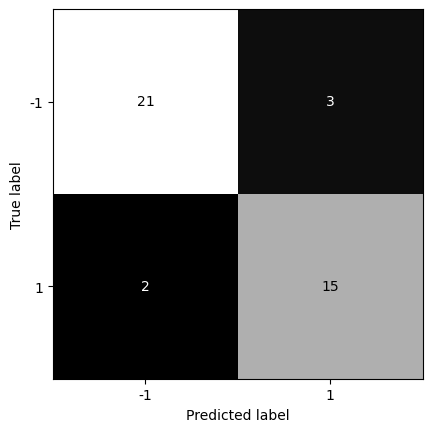

In [78]:
params = {'max_depth': 20, 'learning_rate': 0.05, 'lambda': 0.2, 'gamma': 0.2, 'alpha': 0.05}

# XGBoost expects labels to be 0 and 1, so transform Y_train and Y_valid from [-1,1] to [0,1]
Y_train_xgb = (Y_train + 1) // 2
Y_valid_xgb = (Y_valid + 1) // 2

xgbm = xgb.XGBClassifier(**params)
xgbm.fit(X_train, Y_train_xgb)
xgb_pred = xgbm.predict(X_valid)
xgb_test = xgbm.predict(test_X_new) * 2 - 1

print(classification_report(Y_valid_xgb, xgb_pred, digits=4))
cm = confusion_matrix(Y_valid_xgb, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot(cmap='gray', colorbar=False)

### 5. CatBoost

In [79]:
cat_params = {
    'learning_rate': [0.015, 0.025, 0.05, 0.1, 0.2],
    'iterations': [100, 300, 500, 700, 900],
    'max_depth': [1, 2, 5, 10, 15],
    'min_data_in_leaf': [0.1, 0.3, 0.5, 0.7, 0.9],
}

cat = CatBoostClassifier(verbose = 0)
rnd_search = RandomizedSearchCV(
    estimator = cat,
    param_distributions = cat_params,
    scoring = 'f1_weighted',
    n_iter = 10,
    cv=StratifiedKFold(n_splits = 5),
    random_state = RANDOM_SEED,
)

cv_res = rnd_search.fit(X_train, Y_train)
print("Hyperparameter:", cv_res.best_params_)
print("F1-Weighted:", cv_res.best_score_)

Hyperparameter: {'min_data_in_leaf': 0.9, 'max_depth': 2, 'learning_rate': 0.05, 'iterations': 700}
F1-Weighted: 0.8475354191263282


0:	learn: 0.6714183	total: 722us	remaining: 505ms
1:	learn: 0.6459356	total: 1.35ms	remaining: 471ms
2:	learn: 0.6354270	total: 1.86ms	remaining: 432ms
3:	learn: 0.6283408	total: 2.37ms	remaining: 412ms
4:	learn: 0.6210765	total: 2.91ms	remaining: 405ms
5:	learn: 0.5991193	total: 3.41ms	remaining: 395ms
6:	learn: 0.5905457	total: 3.9ms	remaining: 386ms
7:	learn: 0.5783470	total: 4.4ms	remaining: 381ms
8:	learn: 0.5655077	total: 4.9ms	remaining: 376ms
9:	learn: 0.5546385	total: 5.41ms	remaining: 373ms
10:	learn: 0.5444557	total: 5.92ms	remaining: 371ms
11:	learn: 0.5398291	total: 6.4ms	remaining: 367ms
12:	learn: 0.5307875	total: 7.23ms	remaining: 382ms
13:	learn: 0.5243032	total: 7.8ms	remaining: 382ms
14:	learn: 0.5185449	total: 8.35ms	remaining: 382ms
15:	learn: 0.5108950	total: 8.89ms	remaining: 380ms
16:	learn: 0.5060309	total: 9.52ms	remaining: 383ms
17:	learn: 0.4976149	total: 10.1ms	remaining: 384ms
18:	learn: 0.4879707	total: 10.7ms	remaining: 383ms
19:	learn: 0.4807858	total: 

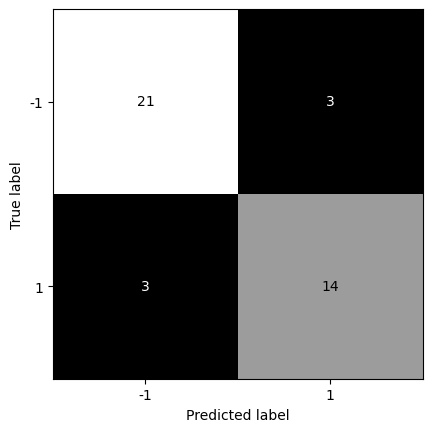

In [80]:
params = {'min_data_in_leaf': 0.9, 'max_depth': 2, 'learning_rate': 0.05, 'iterations': 700}


cat = CatBoostClassifier(**params)
cat.fit(X_train, Y_train)
cat_pred = cat.predict(X_valid)
cat_test = cat.predict(test_X_new)

print(classification_report(Y_valid, cat_pred, digits=4))
cm = confusion_matrix(Y_valid, cat_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot(cmap='gray', colorbar=False)

In [81]:
final = pd.DataFrame({'RF': rf_test, 'GBM': gb_test, 'LightGBM': lgb_test, 'XGBoost': xgb_test, 'CatBoost': cat_test})
final.to_csv('C:/Users/symply_jina/Desktop/2차 과제/2021190002_장서현_prediction.csv', index = False)
final

,RF,GBM,LightGBM,XGBoost,CatBoost
0,1,1,1,1,1
1,1,1,1,1,1
2,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1
4,1,1,1,1,1
5,1,1,1,1,1
6,-1,-1,1,1,-1
7,-1,-1,-1,1,-1
8,-1,-1,-1,-1,-1
9,1,1,1,1,1
